<h1>Sales Data of Adidas in 2020</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp,ttest_ind,f_oneway
from statsmodels.stats.weightstats import ztest
import statsmodels.api as sm
import plotly.express as px
from statsmodels.formula.api import ols

In [2]:
sales = pd.read_csv("Adidas-US-sales-Datasets.csv")
sales

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000.00,50%,In-store
1,Foot Locker,1185732,01-02-2020,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000.00,30%,In-store
2,Foot Locker,1185732,01-03-2020,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000.00,35%,In-store
3,Foot Locker,1185732,01-04-2020,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875.00,35%,In-store
4,Foot Locker,1185732,01-05-2020,Northeast,New York,New York,Men's Apparel,60,900,540000,162000.00,30%,In-store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Men's Apparel,50,64,3200,896.00,28%,Outlet
9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,Manchester,Women's Apparel,41,105,4305,1377.60,32%,Outlet
9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Street Footwear,41,184,7544,2791.28,37%,Outlet
9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,Manchester,Men's Athletic Footwear,42,70,2940,1234.80,42%,Outlet


In [3]:
fig =px.treemap(sales, path=['Region', 'State'], values='Total Sales',
                 title='Treemap for Adidas Sales by Region and State')
fig.show()

In [4]:
fig =px.treemap(sales, path=['Region', 'Retailer'], values='Total Sales',
                 title='Treemap for Adidas Sales by Region and State')
fig.show()

In [5]:
# Calculate the IQR
Q1 = sales['Units Sold'].quantile(0.25)
Q3 = sales['Units Sold'].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
outliers_iqr = sales[(sales['Units Sold']< lower_bound) | (sales['Units Sold'] > upper_bound)]
# df_no_outliers_iqr = sales['Units Sold'][(sales['Units Sold'] >= lower_bound) & (sales['Units Sold'] <= upper_bound)]

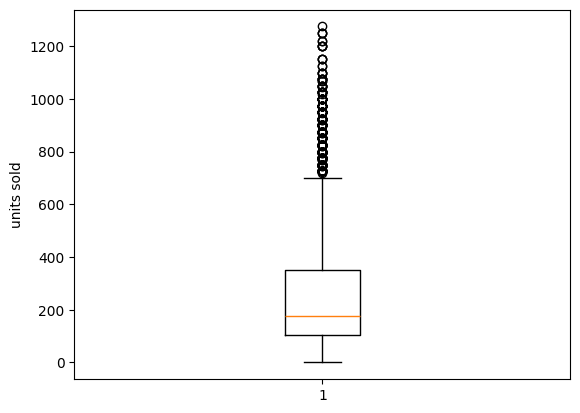

In [6]:
plt.boxplot(sales["Units Sold"])
plt.ylabel("units sold")
plt.show()

<h1>data processing to get month from date</h1>

In [7]:
sales['Month'] = pd.DatetimeIndex(sales['Invoice Date']).month


In [8]:
month_grp = sales.groupby("Month")
month_sales = month_grp["Units Sold"].sum()


<h1>descriptive statistcs</h1>

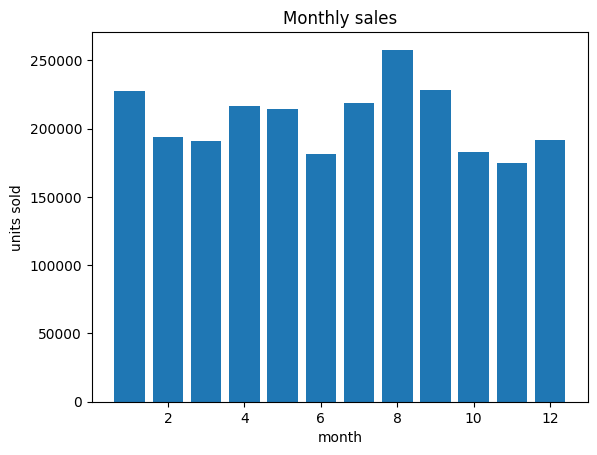

In [9]:
plt.bar(month_sales.index,month_sales)
plt.ylabel("units sold")
plt.xlabel("month")
plt.title("Monthly sales")
plt.show()

<h3>products sold in each month</h3>

<Axes: xlabel='Month'>

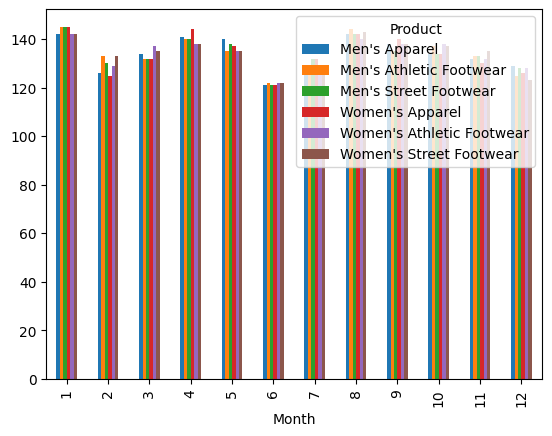

In [10]:

pd.crosstab(sales['Month'],sales['Product']).plot.bar()

<h1>average sales</h1>

In [11]:
sales["Total Sales"].mean()

93273.4375

In [12]:
sales["Total Sales"].std()

141916.01672684302

<h2>box plot </h2>

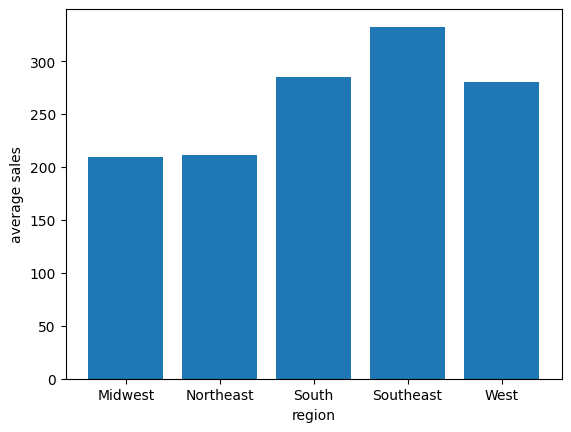

In [13]:
state_grp = sales.groupby("State")
region_grp = sales.groupby("Region")
retailer_grp = sales.groupby("Retailer")
region_sales =region_grp["Units Sold"].mean()
plt.bar(region_sales.index,region_sales)
plt.xlabel("region")
plt.ylabel("average sales")
plt.show()

<h3>distribution of units sold</h3>

<Axes: ylabel='Density'>

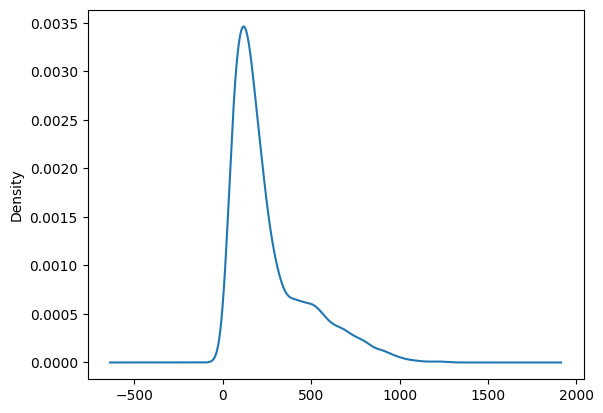

In [14]:
sales["Units Sold"].plot(kind="kde")

<h3>distribution of sales</h3>

<Axes: ylabel='Density'>

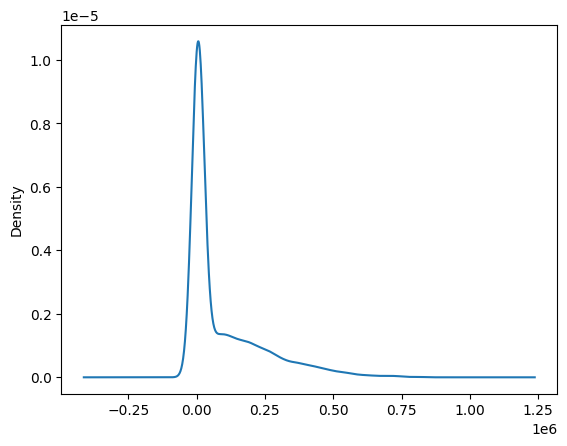

In [15]:
sales["Total Sales"].plot(kind="kde")

<Axes: title={'center': 'Products price distribution'}, ylabel='Frequency'>

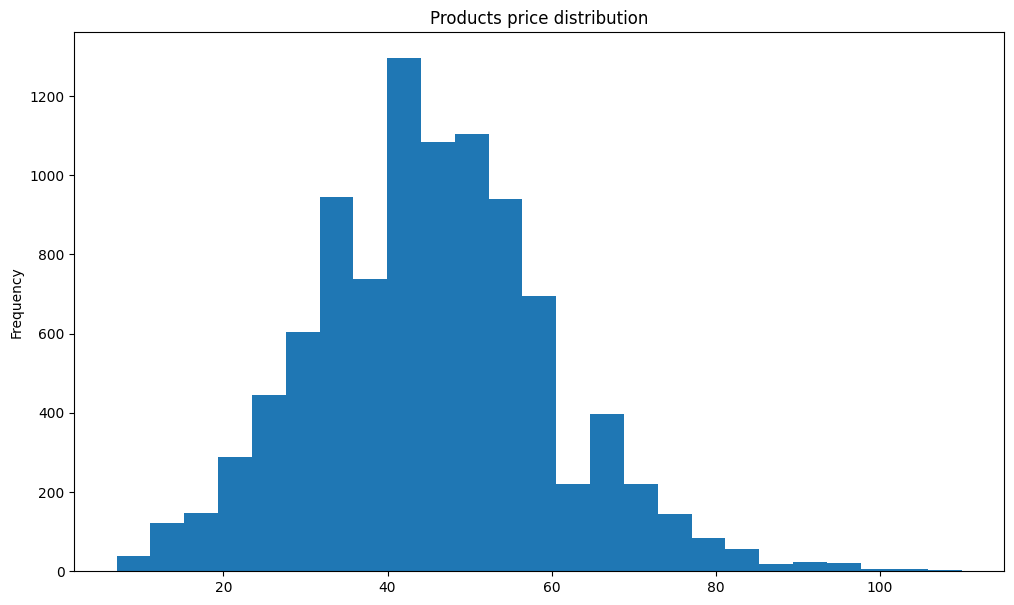

In [16]:
sales['Price per Unit'].plot(kind='hist',bins=25,figsize=(12,7),title='Products price distribution')

<h1>Each region preferred sales method</h1>

<Axes: xlabel='Region'>

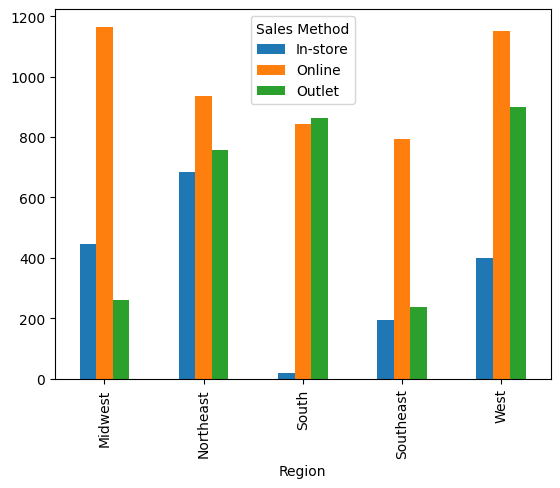

In [17]:
pd.crosstab(sales['Region'],sales['Sales Method']).plot.bar()

<Axes: xlabel='Retailer'>

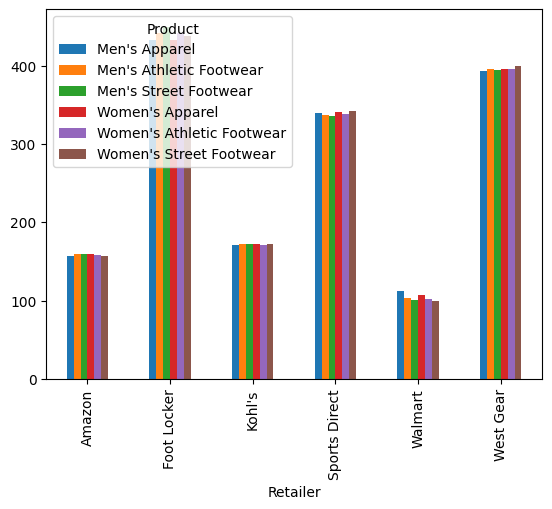

In [18]:
pd.crosstab(sales["Retailer"],sales["Product"]).plot.bar()

<Axes: title={'center': 'Units Sold'}, xlabel='Region'>

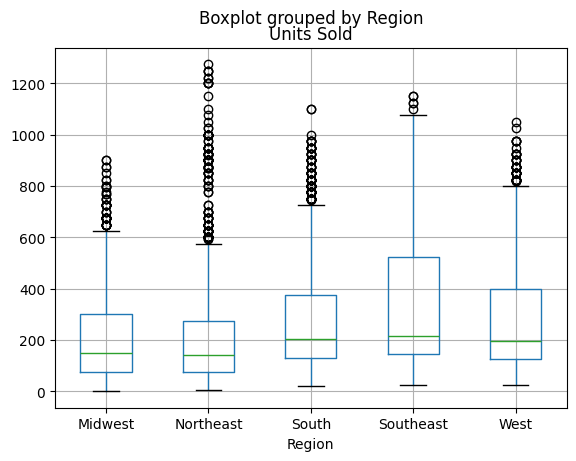

In [19]:
sales.boxplot("Units Sold",by="Region")

In [20]:
a = region_grp["Sales Method"].value_counts()
a

Region     Sales Method
Midwest    Online          1165
           In-store         445
           Outlet           262
Northeast  Online           936
           Outlet           757
           In-store         683
South      Outlet           864
           Online           844
           In-store          20
Southeast  Online           792
           Outlet           238
           In-store         194
West       Online          1152
           Outlet           898
           In-store         398
Name: count, dtype: int64

In [21]:
region_sales = region_grp["Operating Profit"].sum()

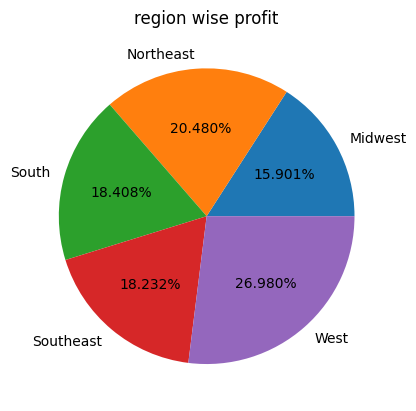

In [22]:
plt.pie(region_sales,labels=region_sales.index,autopct="%1.3f%%")
plt.title("region wise profit")
plt.show()

In [23]:
retailer_count = retailer_grp.count()

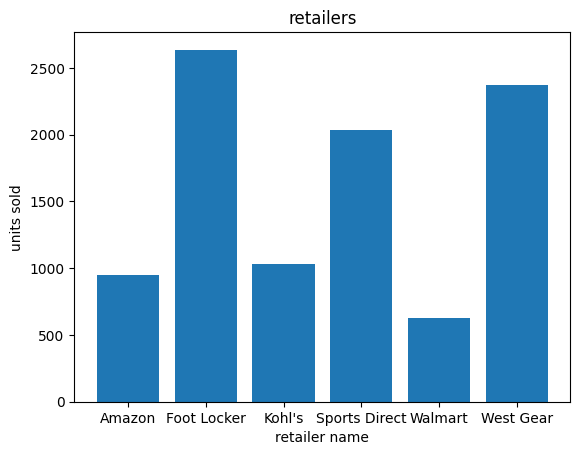

In [24]:
plt.bar(retailer_count.index,retailer_count["Retailer ID"])
plt.title("retailers")
plt.xlabel("retailer name")
plt.ylabel("units sold")
plt.show()

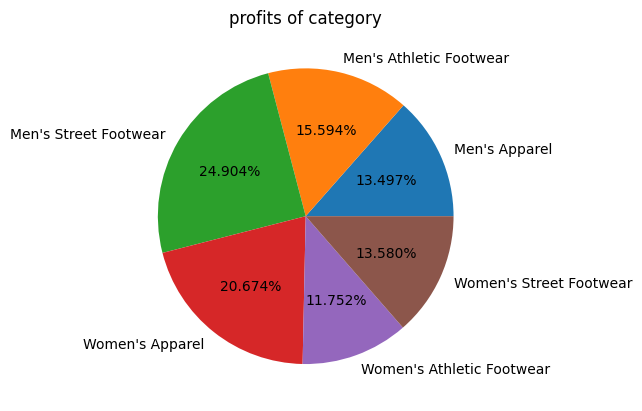

In [25]:
product_sales = sales["Product"].value_counts()
product_profit = sales.groupby("Product")["Operating Profit"].sum()
profitratio = product_profit/product_sales
profitratio
plt.pie(profitratio,labels=profitratio.index,autopct="%1.3f%%")
plt.title("profits of category")
plt.show()

In [26]:
retailer_grp["Product"].value_counts()

Retailer       Product                  
Amazon         Men's Athletic Footwear      159
               Men's Street Footwear        159
               Women's Apparel              159
               Women's Athletic Footwear    158
               Women's Street Footwear      157
               Men's Apparel                157
Foot Locker    Men's Street Footwear        449
               Men's Athletic Footwear      442
               Women's Athletic Footwear    442
               Women's Street Footwear      438
               Men's Apparel                433
               Women's Apparel              433
Kohl's         Women's Apparel              172
               Women's Street Footwear      172
               Men's Street Footwear        172
               Men's Athletic Footwear      172
               Men's Apparel                171
               Women's Athletic Footwear    171
Sports Direct  Women's Street Footwear      342
               Women's Apparel              341

In [27]:
sales["Sales Method"].value_counts()

Sales Method
Online      4889
Outlet      3019
In-store    1740
Name: count, dtype: int64

In [28]:
retailer_grp["Product"].value_counts().unstack()

Product,Men's Apparel,Men's Athletic Footwear,Men's Street Footwear,Women's Apparel,Women's Athletic Footwear,Women's Street Footwear
Retailer,,,,,,
Amazon,157,159,159,159,158,157
Foot Locker,433,442,449,433,442,438
Kohl's,171,172,172,172,171,172
Sports Direct,339,337,335,341,338,342
Walmart,113,104,101,107,102,99
West Gear,393,396,394,396,395,400


In [29]:
retailer_grp["Product"].value_counts().unstack().idxmax(axis=1)

Retailer
Amazon           Men's Athletic Footwear
Foot Locker        Men's Street Footwear
Kohl's           Men's Athletic Footwear
Sports Direct    Women's Street Footwear
Walmart                    Men's Apparel
West Gear        Women's Street Footwear
dtype: object

In [30]:
max_sales =retailer_grp["Product"].value_counts().unstack().max(axis=1)
max_sales

Retailer
Amazon           159
Foot Locker      449
Kohl's           172
Sports Direct    342
Walmart          113
West Gear        400
dtype: int64

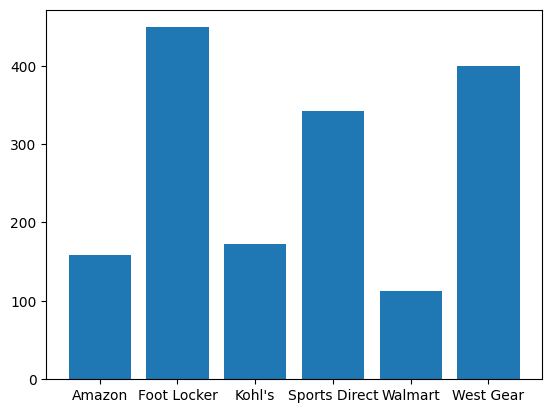

In [31]:
plt.bar(max_sales.index,max_sales)
plt.show()

<h3>Total sales in each state</h3>

In [32]:
state_grp["Total Sales"].sum()

State
Alabama           17633424
Alaska            14753103
Arizona           15782221
Arkansas          12639347
California        60174133
Colorado          20996536
Connecticut       11573448
Delaware          12298412
Florida           59283714
Georgia           18997466
Hawaii            22282457
Idaho             19276878
Illinois           9797488
Indiana            8836198
Iowa               7424011
Kansas             9972864
Kentucky          10072848
Louisiana         23750781
Maine              9195978
Maryland           7758059
Massachusetts     11076810
Michigan          18625433
Minnesota          7378068
Mississippi       15591709
Missouri           9683265
Montana           15710886
Nebraska           5929038
Nevada            20858509
New Hampshire     16411667
New Jersey         9934246
New Mexico        19865016
New York          64229039
North Carolina    23956531
North Dakota       7735580
Ohio              18484583
Oklahoma          10620734
Oregon            2134

<h1>Inferential statistics</h1>

<h3>Z test to find if there is a difference between national average and newyorks average sale </h3>
<h5>ho : There is no significant difference between the sales of newyork and nation</h5>
<h5>h1 : There is a significant difference between the sales of newyork and nation</h5>

In [33]:
national_avg = sales["Total Sales"].mean()
newyork_sales = state_grp.get_group("New York")["Total Sales"]


In [34]:
z,p = ztest(newyork_sales,value=national_avg)
if(p<0.05):
    print("sales of newyork and nation differ significantly.Therefore ho rejected")
else:
    print("sales of newyork and nation dont  differ significantly.Therefore ho accepted")
print("p value = ",p)
    

sales of newyork and nation differ significantly.Therefore ho rejected
p value =  9.450466345579597e-13


<h3>t test to compare the sales of newyork and washington</h3>
<h5>ho : There is no significant difference between the sales of newyork and washington</h5>
<h5>h1 : There is a significant difference between the sales of newyork and washington</h5>

In [35]:

washington_sales = state_grp.get_group("Washington")["Total Sales"]
t,p = ttest_ind(washington_sales,newyork_sales,equal_var=False)
if(p<0.05):
    print("sales of newyork and washington differ significantly.Therefore ho rejected")
else:
    print("sales of newyork and washington don't differ significantly.Therefor ho accepted")
print("p value = ",p)


sales of newyork and washington don't differ significantly.Therefor ho accepted
p value =  0.8298439359174566


<h3>t test to compare the sales of newyork and Iowa</h3>
<h5>ho : There is no significant difference between the sales of newyork and Iowa</h5>
<h5>h1 : There is a significant difference between the sales of newyork and Iowa</h5>

In [36]:
iowa_sales = state_grp.get_group("Iowa")["Total Sales"]
t,p = ttest_ind(newyork_sales,iowa_sales,equal_var=False)
if(p<0.05):
    print("sales of newyork and iowa differ significantly.Therefore ho rejected")
else:
    print("sales of newyork and iowa don't differ significantly.Therefore h1 accepted")
print("p value = ",p)

sales of newyork and iowa differ significantly.Therefore ho rejected
p value =  5.281575111600401e-20


<h3>t test to comapare the sales in the month of august and june</h3>(june has the lowest sales and august has the highest)
<h5>ho : There is no significant difference between the sales in November and august</h5>
<h5>h1 : There is a significant difference between the sales of November and august</h5>

In [37]:
november_sales = month_grp.get_group(11)["Total Sales"]
august_sales = month_grp.get_group(8)["Total Sales"]
t,p = ttest_ind(november_sales,august_sales,equal_var=False)
if(p<0.05):
    print("sales of august and november differ significantly.Therefore ho rejected")
else:
    print("sales of august and november dont differ significantly.Therefore ho accepeted")
print("p value = ",p)

sales of august and november differ significantly.Therefore ho rejected
p value =  0.0009974340251482938


<h3>ANOVA to check if there is a difference in sales based on region</h3>
<h4>using all regions</h4>

In [38]:
midwest = region_grp.get_group("Midwest")["Units Sold"]
northeast = region_grp.get_group("Northeast")["Units Sold"]
south = region_grp.get_group("South")["Units Sold"]
southeast= region_grp.get_group("Southeast")["Units Sold"]
west = region_grp.get_group("West")["Units Sold"]
f,p = f_oneway(midwest,northeast,south,southeast,west)
if(p<0.05):
    print("sales of regions differ significantly")
else:
    print("sales of regions dont differ significantly")
print("p value = ",p)


sales of regions differ significantly
p value =  2.2859855179121352e-90


<h4>comparing midwest and northeast</h4>

In [39]:
f,p = f_oneway(midwest,northeast)
if(p<0.05):
    print("sales of midwest and northeast differ significantly")
else:
    print("sales of midwest and northeast dont differ significantly")
print("p value = ",p)

sales of midwest and northeast dont differ significantly
p value =  0.7440773363095058


<h1>correlation and regression</h1>

In [40]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

from sklearn import metrics

In [41]:
copy_sales = sales
copy_sales["Region"]=pd.factorize(sales["Region"])[0]
copy_sales["State"]=pd.factorize(sales["State"])[0]
copy_sales["City"] = pd.factorize(sales["City"])[0]
copy_sales["Product"] = pd.factorize(sales["Product"])[0]
copy_sales["Retailer"] = pd.factorize(sales["Retailer"])[0]
copy_sales["Operating Margin"] = copy_sales["Operating Margin"].str.rstrip("%").astype("float") / 100

copy_sales

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Month
0,0,1185732,01-01-2020,0,0,0,0,50,1200,600000,300000.00,0.50,In-store,1
1,0,1185732,01-02-2020,0,0,0,1,50,1000,500000,150000.00,0.30,In-store,1
2,0,1185732,01-03-2020,0,0,0,2,40,1000,400000,140000.00,0.35,In-store,1
3,0,1185732,01-04-2020,0,0,0,3,45,850,382500,133875.00,0.35,In-store,1
4,0,1185732,01-05-2020,0,0,0,4,60,900,540000,162000.00,0.30,In-store,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,0,1185732,1/24/2021,0,49,51,4,50,64,3200,896.00,0.28,Outlet,1
9644,0,1185732,1/24/2021,0,49,51,5,41,105,4305,1377.60,0.32,Outlet,1
9645,0,1185732,2/22/2021,0,49,51,0,41,184,7544,2791.28,0.37,Outlet,2
9646,0,1185732,2/22/2021,0,49,51,1,42,70,2940,1234.80,0.42,Outlet,2


In [42]:
copy_sales.rename(columns = {'Sales Method':'Method'}, inplace = True)
copy_sales["Method"] = pd.factorize(sales["Method"])[0]
copy_sales.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method,Month
0,0,1185732,01-01-2020,0,0,0,0,50,1200,600000,300000.0,0.50,0,1
1,0,1185732,01-02-2020,0,0,0,1,50,1000,500000,150000.0,0.30,0,1
2,0,1185732,01-03-2020,0,0,0,2,40,1000,400000,140000.0,0.35,0,1
3,0,1185732,01-04-2020,0,0,0,3,45,850,382500,133875.0,0.35,0,1
4,0,1185732,01-05-2020,0,0,0,4,60,900,540000,162000.0,0.30,0,1


In [43]:
copy_sales = copy_sales.drop('Invoice Date',axis=1)

In [44]:
copy_sales['Units Sold'] = copy_sales['Units Sold'].astype(int)
copy_sales['Total Sales'] = copy_sales['Total Sales'].astype(int)
copy_sales['Operating Profit'] = copy_sales['Operating Profit'].astype(int)
copy_sales['Retailer'] = copy_sales['Retailer'].astype(int)
copy_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   int32  
 1   Retailer ID       9648 non-null   int64  
 2   Region            9648 non-null   int64  
 3   State             9648 non-null   int64  
 4   City              9648 non-null   int64  
 5   Product           9648 non-null   int64  
 6   Price per Unit    9648 non-null   int64  
 7   Units Sold        9648 non-null   int32  
 8   Total Sales       9648 non-null   int32  
 9   Operating Profit  9648 non-null   int32  
 10  Operating Margin  9648 non-null   float64
 11  Method            9648 non-null   int64  
 12  Month             9648 non-null   int32  
dtypes: float64(1), int32(5), int64(7)
memory usage: 791.6 KB


In [45]:
copy_sales.corr()

,Retailer,Retailer ID,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Method,Month
Retailer,1.000000,-0.001378,-0.097952,0.096816,0.096194,0.002262,0.057918,0.007130,0.016339,0.012788,0.001682,-0.005612,-0.089274
Retailer ID,-0.001378,1.000000,-0.264372,0.208824,0.214804,0.000277,-0.391684,-0.003194,-0.083580,-0.027137,0.216780,0.032245,0.111350
Region,-0.097952,-0.264372,1.000000,-0.209003,-0.176060,-0.000121,0.042493,0.095324,0.079305,0.072539,-0.002096,0.130336,-0.046704
State,0.096816,0.208824,-0.209003,1.000000,0.976045,0.000367,-0.147839,-0.251792,-0.158281,-0.145208,-0.019765,-0.013363,0.026056
City,0.096194,0.214804,-0.176060,0.976045,1.000000,0.000393,-0.143264,-0.244089,-0.151011,-0.137264,-0.023920,-0.011398,0.032779
Product,0.002262,0.000277,-0.000121,0.000367,0.000393,1.000000,0.190119,-0.177418,-0.055137,-0.054475,0.010860,-0.000524,0.001396
Price per Unit,0.057918,-0.391684,0.042493,-0.147839,-0.143264,0.190119,1.000000,0.265869,0.435811,0.394546,-0.137486,-0.026885,0.252907
Units Sold,0.007130,-0.003194,0.095324,-0.251792,-0.244089,-0.177418,0.265869,1.000000,0.913431,0.892380,-0.305479,-0.355552,-0.013292
Total Sales,0.016339,-0.083580,0.079305,-0.158281,-0.151011,-0.055137,0.435811,0.913431,1.000000,0.956308,-0.364592,-0.386013,0.045054
Operating Profit,0.012788,-0.027137,0.072539,-0.145208,-0.137264,-0.054475,0.394546,0.892380,0.956308,1.000000,-0.211921,-0.350035,0.055252


<Axes: >

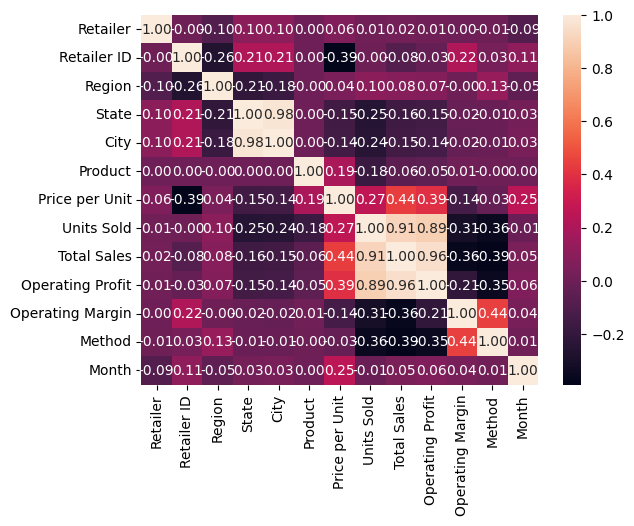

In [46]:
sns.heatmap(copy_sales.corr(),annot=True, fmt='.2f')

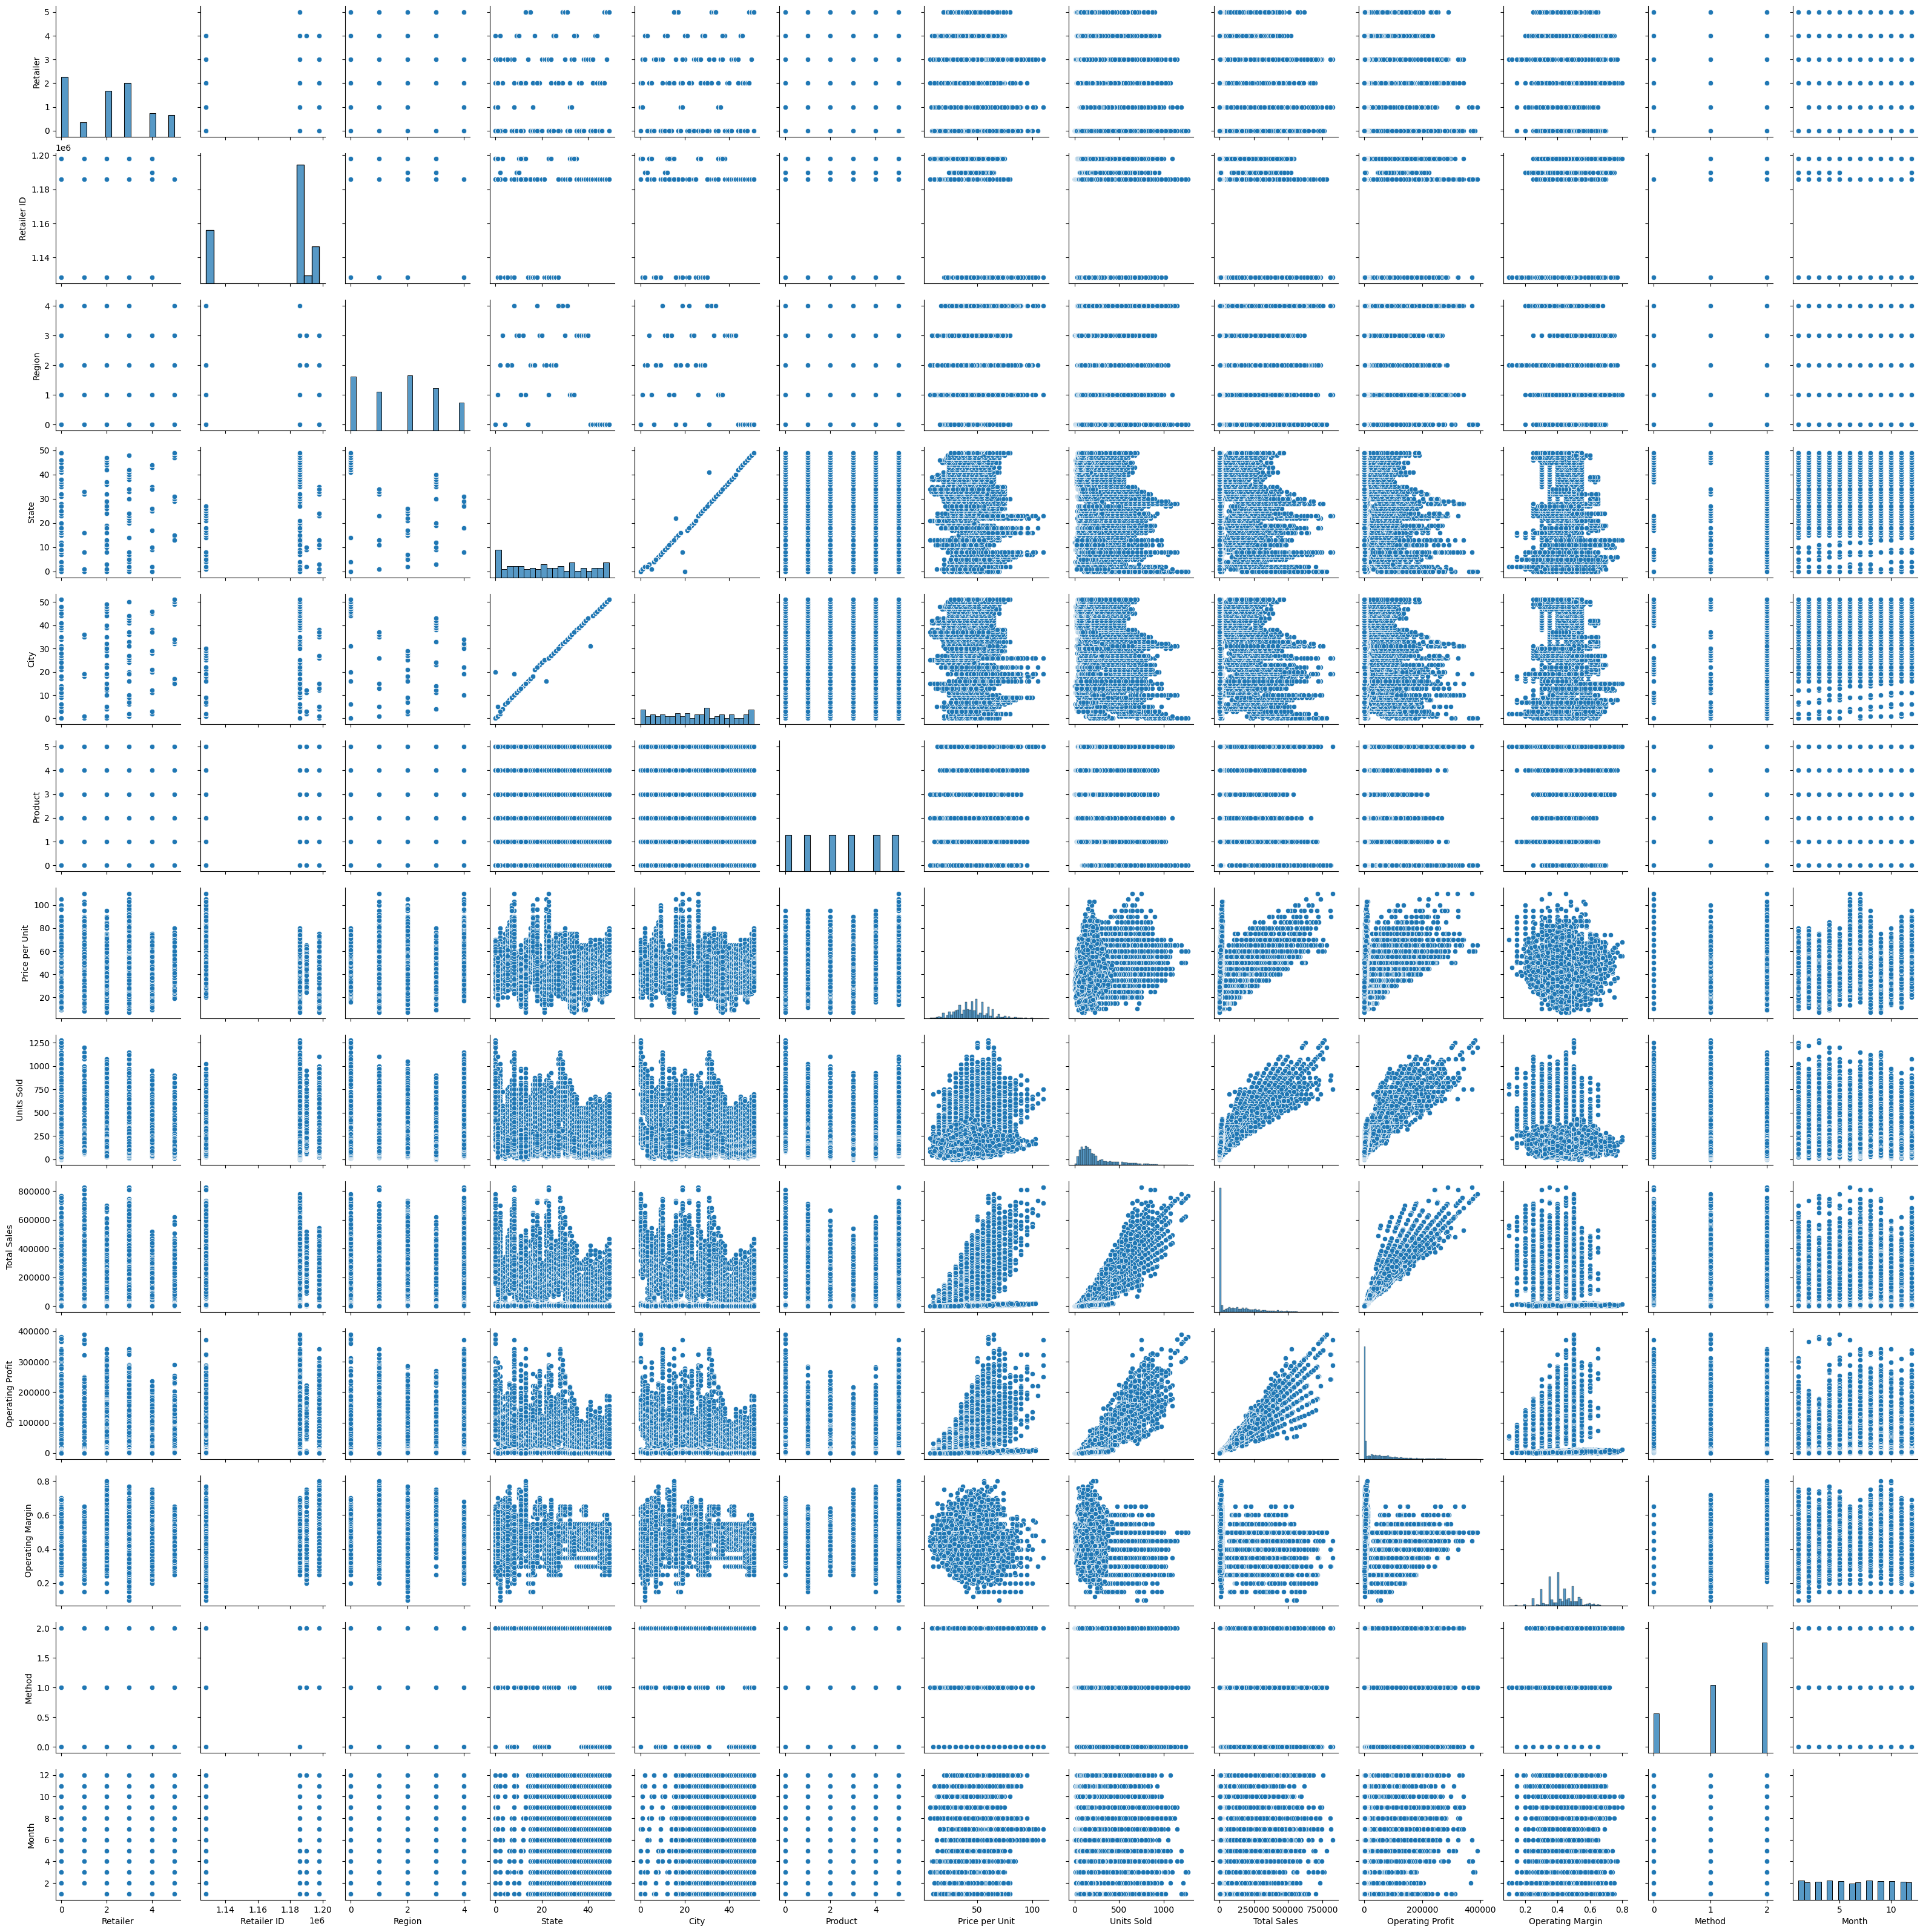

In [47]:

copy_sales
sns.pairplot(copy_sales)

In [48]:
#x is all the columns except units sold
#predictor variables
X= copy_sales.values[:,(0,1,2,3,4,5,6,8,9,10)]

#y is units sold
Y= copy_sales.values[:, 7]

#splitting values to train the model and to test the model
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [49]:


#creating many models to choose the best model
#linear regression,decissiontree,randomforest,kneighbours,xgbregression
pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                     ("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                     ("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                     ("rf_classifier",RandomForestRegressor())])


pipeline_kn=Pipeline([("scalar4",StandardScaler()),
                     ("rf_classifier",KNeighborsRegressor())])


pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                     ("rf_classifier",XGBRegressor())])

# List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_kn, pipeline_xgb]

# Dictionary of pipelines and model types for ease of reference
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}

# For each modelin the list training the data
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [50]:
#list to store the cross validation score
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipe_dict[i], cv_score.mean()))

LinearRegression: -73.043559 
DecisionTree: -17.297337 
RandomForest: -11.340504 
KNeighbors: -43.990007 
XGBRegressor: -10.705017 


R^2: 0.997746427326479
Adjusted R^2: 0.9977370413511624


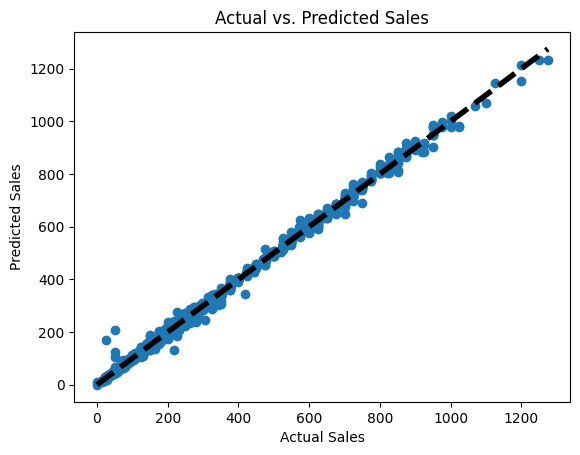

In [51]:
#xgbregression has the least negative value
#so for our data the best model is xgbregression
# Model prediction on test data
pred = pipeline_xgb.predict(X_test)
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))


plt.scatter(y_test, pred)

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# Set the plot title and axis labels
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Show the plot
plt.show()

<h1>All imports</h1>

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import ttest_1samp,ttest_ind,f_oneway
from statsmodels.stats.weightstats import ztest
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

dropna
fillna